In [2]:
!pip install opencv-python

### In order to train a deep learning model for bird classification, a large and diverse dataset is required. In this case, a dataset of 3000 images was provided for each of the 3 bird classes: Pica Pica, Erithacus Rubecula, and Periparus Ater.

### Tagging images: After collecting the images, each image was manually tagged with its corresponding bird class. This was done by opening each image and labeling it as Pica Pica, Erithacus Rubecula, or Periparus Ater.

### Removing outliers: After tagging all of the images, the dataset was reviewed to identify any images that did not belong to the desired bird classes. These images were removed from the dataset to ensure that the dataset was as clean and accurate as possible.

### Splitting dataset: Finally, the dataset was split into training, validation, and test sets. This step is important to evaluate the performance of the model during the training process and to evaluate its performance on unseen data.

### The process of manually tagging a dataset is time-consuming and labor-intensive, but it is essential for creating a high-quality dataset that can be used to train accurate and effective deep learning models. By removing outliers and ensuring that the dataset is as clean and accurate as possible, the performance of the models can be improved and the chances of overfitting can be reduced.

# **PREPROCESSING**

# Section 1: Importing necessary libraries and setting up the directory paths


### In this section, the necessary libraries are imported such as os, seaborn, numpy, matplotlib, xml, cv2 and random. These libraries are used for various tasks such as file manipulation, image processing, data visualization and more.

In [9]:
# Import the necessary libraries
import os
import seaborn as sns
import numpy as np
from matplotlib.pyplot import imread
import xml.etree.ElementTree as ET
import cv2
import os
import random

In [ ]:
# Enable inline plotting
%matplotlib inline

# Section 2: Plotting the distribution of image dimensions

### In this section, the code loops through all the images in the "images" folder and appends the width and height of each image to the dim1 and dim2 lists respectively. Then a joint plot is created using the sns.jointplot() function to visualize the distribution of the dimensions of the images. The kind parameter is set to "kde" to plot a kernel density estimation of the data. The mean and minimum and maximum values of the dimensions are also printed.

In [ ]:
# Create lists to store the dimensions of the images
dim1 = []
dim2 = []

In [12]:
# Iterate over the image files in the images directory
for image_filename in os.listdir('./images'):
    name, ext = os.path.splitext(image_filename)
    
    # Try to read the image
    try:
        if not ext == '.xml':
            img = imread('./images/'+image_filename)
            d1,d2,color = img.shape
            
            # Append the dimensions to the lists
            dim1.append(d1)
            dim2.append(d2)
    
    # If an exception is thrown, skip the file
    except: 
        print(image_filename)
        continue

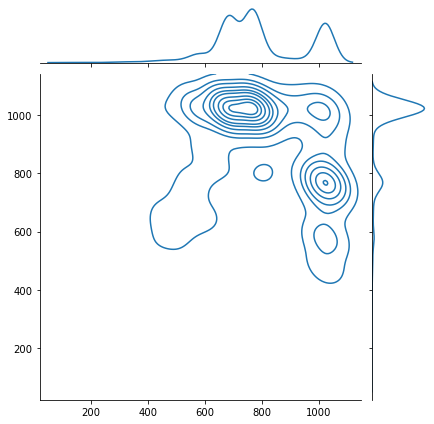

In [13]:
# Plot the distribution of the dimensions using a jointplot
sns.jointplot(x = dim1,y = dim2,kind="kde")

In [14]:
np.mean(dim1)

788.564

In [15]:
print('Min:', np.min(dim1))
print('Max:', np.max(dim1))

Min: 142
Max: 1024


In [16]:
np.mean(dim2)

940.283

In [17]:
print('Min:', np.min(dim2))
print('Max:', np.max(dim2))

Min: 140
Max: 1024


In [44]:
len(dim1)

3000

In [45]:
len(dim2)

3000

# Section 3: Renaming files with specific criteria



### In this section, the code loops through all the files in the "images" folder and checks if the file name contains "Pica_pica" and has a .jpg extension. If the conditions are met, the code concatenates the parts of the file name, renames the file with the new file name and moves the file to a new location.

In [29]:
# Define the path to the images directory
image_dir = './images'

for file_name in os.listdir(image_dir):
    if file_name.endswith('.jpg') and 'Pica_pica' in file_name:
        # Get the full path of the current file
        old_file_path = os.path.join(image_dir, file_name)
        # Get the parts of the file name
        parts = file_name.split('_')
        # Create the new file name by concatenating the parts
        new_file_name = file_name[:file_name.rindex('_')]+file_name[file_name.rindex('_')+1:]
        # Get the full path of the new file
        new_file_path = os.path.join(image_dir, new_file_name)
        # Rename the file
        os.rename(old_file_path, new_file_path)

print("All files has been renamed successfully.")


All files has been renamed successfully.


# Section 4: Removing xml files that have no corresponding image



### In this section, the code first get the image files extension types and the xml files and check the difference between the xml files and the image files. the code then iterate over the xml files to delete and remove it.

In [39]:
image_dir = './images'
xml_dir = './images'

image_files = set()
xml_files = set()

# get the image files extension types
extensions = ('.jpeg','.jpg','.png','.bmp')
for file in os.listdir(image_dir):
    if file.endswith(extensions):
        image_files.add(os.path.splitext(file)[0])
# get the xml files
for file in os.listdir(xml_dir):
    if file.endswith('.xml'):
        xml_files.add(os.path.splitext(file)[0])
# get the difference between the xml files and the image files
xml_files_to_delete = xml_files - image_files

deleted_count = 0
# iterate over the xml files to delete
for file_name in xml_files_to_delete:
    xml_path = os.path.join(xml_dir, file_name+'.xml')
    os.remove(xml_path)
    deleted_count +=1

print(f'{deleted_count} files has been deleted')


0 files has been deleted


# Section 5: Removing small images



### In this section, the code defines the minimum size of the images to keep as MIN_SIZE and the directories that contains the images and the xml files. Then the code loops through all the image files and checks the width and height of the image, if the width and height are less than the MIN_SIZE the image and its corresponding xml file will be removed.





In [41]:
# Define the minimum size of the images to keep
MIN_SIZE = 500

# Define the directory that contains the images
IMAGE_DIR = './images'

# Define the directory that contains the xml files
XML_DIR = './images'

# initialize the counter variable
deleted_count = 0

for file_name in os.listdir(IMAGE_DIR):
    if file_name.endswith(("jpg", "png", "jpeg")):
        image_path = os.path.join(IMAGE_DIR, file_name)
        xml_path = os.path.join(XML_DIR, os.path.splitext(file_name)[0] + '.xml')
        
        # Open the image
        image = cv2.imread(image_path)
        height, width, _ = image.shape
        # check if the size is less than MIN_SIZE
        if height < MIN_SIZE or width < MIN_SIZE:
            os.remove(image_path)
            os.remove(xml_path)
            deleted_count += 1
        else:
            # Check if image is blurred
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            fm = cv2.Laplacian(gray, cv2.CV_64F).var()
            if fm < 100:
                os.remove(image_path)
                os.remove(xml_path)
                deleted_count += 1

print(f"Deleted {deleted_count} files.")


Deleted 68 files.
